<a href="https://colab.research.google.com/github/CaptainJimbo/MyPortfolio/blob/main/DigitClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table align="left">
  <td align="left">
  <a target="_blank" href="https://dimitriskogias.wixsite.com/spacecowboy" style="text-decoration: none; display: flex; align-items: center; color: white; background-color: purple; padding: 10px; border-radius: 5px;">
      <img src="https://static.wikia.nocookie.net/bravestarr/images/6/6d/Lucas_Conway.png/revision/latest?cb=20211111224054" width="40px" height="40px" style="border-radius: 50%; margin-right: 10px;" />
      <span>Visit my Webpage</span>
    </a>
  </td>
</table>



<table align="left">
  <td align="left"><a target="_blank" href="https://github.com/CaptainJimbo/MyPortfolio/blob/main/DigitClassification.ipynb" style="text-decoration: none; display: flex; align-items: center; color: black; background-color: lightgray; padding: 10px; border-radius: 5px;">
        <img src="https://i.ibb.co/xfJbPmL/github.png"  width="40px" height="40px" style="border-radius: 50%; margin-right: 10px;"   />View it on GitHub</a></td>
</table>


<h1 align='center'> <b>THE MNIST DATABASE <i>of handwritten digits</i> </b>
</h1>
<p align='center'>
    <b>Yann LeCun</b>, Courant Institute, NYU<br>
    <b>Corinna Cortes</b>, Google Labs, New York<br>
    <b>Christopher J.C. Burges</b>, Microsoft Research, Redmond<br>
</p>

<p>The MNIST database of handwritten digits, has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image. It is a good database for implementing Machine Learning and Neural Network methods while spending minimal efforts on preprocessing and formatting.
I will build models that once able to read the random handwrittten digits from images after they are trained from labeled images (supervised learning, neural networks, deep learning models) or groupify the handwritten digits in categories for self-labeling. This a computer vision problem. </p>
<p>METHODS IMPLEMENTED:
<ul>
    <li> Supervised Learning
    <ul>
        <li> Logistic Regression
        <li> K-Nearest Neighbours
        <li> Support Vector Machines
        <li> Decision Tree Classifier
    </ul>
    <li> Unsupervised Learning
    <ul>
        <li> KMeans
        <li> DBSCAN
        <li> t-SNE
        <li> Semisuprvised Learning
        <li> others
    </ul>
    <li> Neural Networks
    <ul>
        <li> Fully Connected Layer Model
        <li> Convolutional Neural Network Model
    </ul>
</ul>
<p>

In [1]:
# Dataset
from tensorflow.keras.datasets import mnist

# Important Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from tqdm import tqdm

# Machine Learning
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

# Neural Networks
import tensorflow as tf
# assert len(tf.config.list_physical_devices('GPU')) > 0

In [2]:
# Load the dataset. It is a tuple of two tuples with arrays which are images in array type.
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


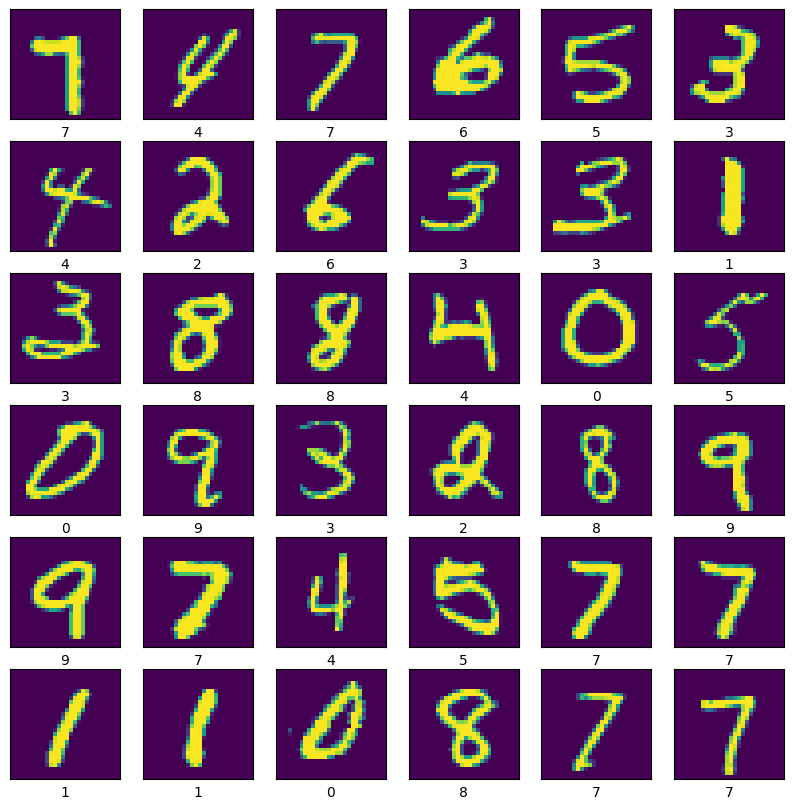

In [3]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(train_images[image_ind])#, cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])

<h2> Supervised Learning </h2>
<a id="LR"></a>  
    <ul>
        <li> Logistic Regression
        <li> K-Nearest Neighbours
        <li> Support Vector Machines
        <li> Decision Tree Classifier
    </ul>

In [4]:
models = {'Logistic Regression':LogisticRegression(max_iter=10000),
          'K Nearest Neighbours':KNeighborsClassifier(),
          'Support Vector Machines':SVC(),
          'Decision Tree':DecisionTreeClassifier()
             }
scores = ['accuracy']#'balanced accuracy','f1']
results = pd.DataFrame(columns=list(models.keys()),index=scores)

In [5]:
N = 6000
n = 600
for model_name in tqdm(models):
    model = models[model_name]
    model.fit(train_images[:N].reshape(-1,28*28)/255, train_labels[:N])
    predictions = model.predict(test_images[:n].reshape(-1,28*28)/255)
    results.loc['accuracy',model_name] = accuracy_score(test_labels[:n],predictions)
results.transpose()

100%|██████████| 4/4 [00:20<00:00,  5.20s/it]


,accuracy
Logistic Regression,0.89
K Nearest Neighbours,0.918333
Support Vector Machines,0.941667
Decision Tree,0.765


<h2> Supervised Learning </h2>
<a id="LR"></a>  
    <ul>
        <li> Neural Networks
        <ul>
            <li> Fully Connected Layers
            <li> Convolutional Neural Networks
        </ul>
    </ul>

In [6]:
# These commands are to make the inputs suitable for neural network models
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_labels = (test_labels).astype(np.int64)

# Or I can use array = array.reshape(-1, 28, 28, 1) / 255.0).astype(np.float32)

Let's check some images again


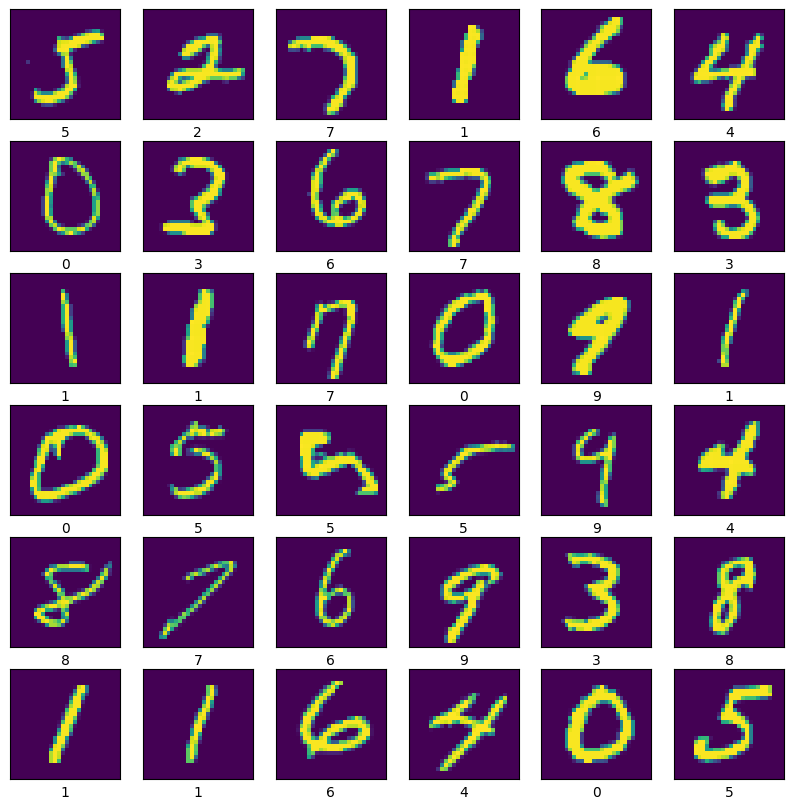

In [7]:
print('Let\'s check some images again')
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    # The command np.squeeze makes the array a 1-dimensional input suitable for plt.imshow()
    plt.imshow(np.squeeze(train_images[image_ind]))#, cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])

In [8]:
# A fucntuon for a fully connected layer
def fully_connected_model():
  fc_model = tf.keras.Sequential([
      # I flatten the input so that it can be fed into the model
      tf.keras.layers.Flatten(),
      # Activation function for the first fully connected (Dense) layer
      tf.keras.layers.Dense(128, activation= 'sigmoid'),
      # Second Dense layer that outputs the probability distribution across the 10 classes (0 to 9)
      tf.keras.layers.Dense(10, activation= 'softmax')
  ])
  return fc_model

model = fully_connected_model()
#model.predict(train_images[[0]])
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
BATCH_SIZE = 64
EPOCHS = 5
model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/5
938/938 [==============================] - 2s 2ms/step - loss: 0.7063 - accuracy: 0.8293
Epoch 2/5
938/938 [==============================] - 2s 2ms/step - loss: 0.3531 - accuracy: 0.9004
Epoch 3/5
938/938 [==============================] - 2s 2ms/step - loss: 0.3068 - accuracy: 0.9114
Epoch 4/5
938/938 [==============================] - 2s 2ms/step - loss: 0.2808 - accuracy: 0.9190
Epoch 5/5
938/938 [==============================] - 2s 2ms/step - loss: 0.2608 - accuracy: 0.9249


In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
results['fully connected model'] = test_acc
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.2446 - accuracy: 0.9309
Test accuracy: 0.930899977684021


In [11]:
# A Convolutional Neural Network, CNN
def build_cnn_model():
    cnn_model = tf.keras.Sequential([
        # Convolutional Layer #1
        tf.keras.layers.Conv2D(filters=24, kernel_size=(3,3), activation=tf.nn.relu ),
        # Max pooling layer #1
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        # Convolutional Layer #2
        tf.keras.layers.Conv2D(filters=36, kernel_size=(3,3), activation=tf.nn.relu ),
        # Max pooling layer #2
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        # Final Dense layer that outputs probabilities, hence softmax.
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])

    return cnn_model

cnn_model = build_cnn_model()
# Some data through to initiatem cnn_mocel
cnn_model.predict(train_images[[0]])
print(cnn_model.summary())

1/1 [==============================] - 0s 225ms/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 24)        240       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 24)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 36)        7812      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 36)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 900)               0         
                                                                 
 

In [12]:
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), # Hanging indent style
                  loss=tf.keras.losses.sparse_categorical_crossentropy,
                  metrics=['accuracy'])

# I train the CNN model, with the same batch_size and number of epochs previously used
cnn_model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/5
938/938 [==============================] - 25s 26ms/step - loss: 0.1825 - accuracy: 0.9467
Epoch 2/5
938/938 [==============================] - 24s 25ms/step - loss: 0.0535 - accuracy: 0.9837
Epoch 3/5
938/938 [==============================] - 25s 27ms/step - loss: 0.0363 - accuracy: 0.9890
Epoch 4/5
938/938 [==============================] - 24s 25ms/step - loss: 0.0290 - accuracy: 0.9911
Epoch 5/5
938/938 [==============================] - 24s 25ms/step - loss: 0.0227 - accuracy: 0.9931


In [13]:
# I test the models accuracy with test data
test_loss, test_acc = cnn_model.evaluate(test_images,test_labels)
results['cnn model'] = test_acc
print('Test accuracy:', test_acc)
print('Much better that a standard fully connected layer')

313/313 [==============================] - 1s 4ms/step - loss: 0.0281 - accuracy: 0.9909
Test accuracy: 0.9908999800682068
Much better that a standard fully connected layer


In [14]:
predictions = cnn_model.predict(test_images)
predictions[0]

313/313 [==============================] - 2s 4ms/step


array([3.6619965e-09, 1.9554372e-07, 6.5317240e-06, 7.3212350e-06,
       1.3954970e-07, 2.2926780e-08, 1.4586105e-12, 9.9998409e-01,
       3.8262662e-08, 1.5750796e-06], dtype=float32)

In [15]:
prediction = np.argmax(predictions[0])
print(prediction)

7


Label of this digit is: 7


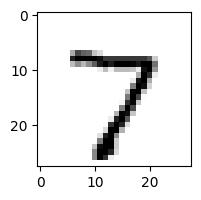

In [16]:
print("Label of this digit is:", test_labels[0])
plt.figure(figsize=(2,2))
plt.imshow(test_images[0,:,:,0], cmap=plt.cm.binary)
plt.show()

In [17]:
results.transpose()

,accuracy
Logistic Regression,0.89
K Nearest Neighbours,0.918333
Support Vector Machines,0.941667
Decision Tree,0.765
fully connected model,0.9309
cnn model,0.9909


<h2> Unsupervised Learning </h2>
    <ul>
        <li> KMeans
        <li> t-SNE
    </ul>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=50)

8 8
7 7
7 9
7 9
0 0
1 1
1 1
5 5
2 2
0 0
4 3
5 8
5 4
7 7
5 5
2 2
6 6
7 4
9 7
1 1
8 8
1 0
8 9
2 2
0 0
0 0
2 1
6 9
2 2


for km_label in range(n_clusters):
    lst = []
    for i in np.where(kmeans.labels_==km_label)[0]:
        lst.append(y[i])
    label = round(sum(lst)/len(lst))
    print(label)

for km_label in range(50):
  array = np.array([y[i] for i in np.where(kmeans.labels_==km_label)[0]])
  label = round(array.mean())
  print(label)

for i in range(5):
    dummy_list = []
    for j,true_label in enumerate(y):
        if  == kmeans_label:
            dummy_list.append(kmeans.cluster_)
    cl_list[i] = dummy_list

In [22]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import seaborn as sns

In [23]:
tsne = TSNE(n_components=2, random_state=42, perplexity=40, n_iter=300 )
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
X = (train_images.reshape(-1,28*28)/255)[:20000]
y = train_labels[:20000]
X_tsne = tsne.fit_transform(X)
df = pd.DataFrame({'tsne_x': X_tsne[:, 0], 'tsne_y': X_tsne[:, 1], 'label': y})

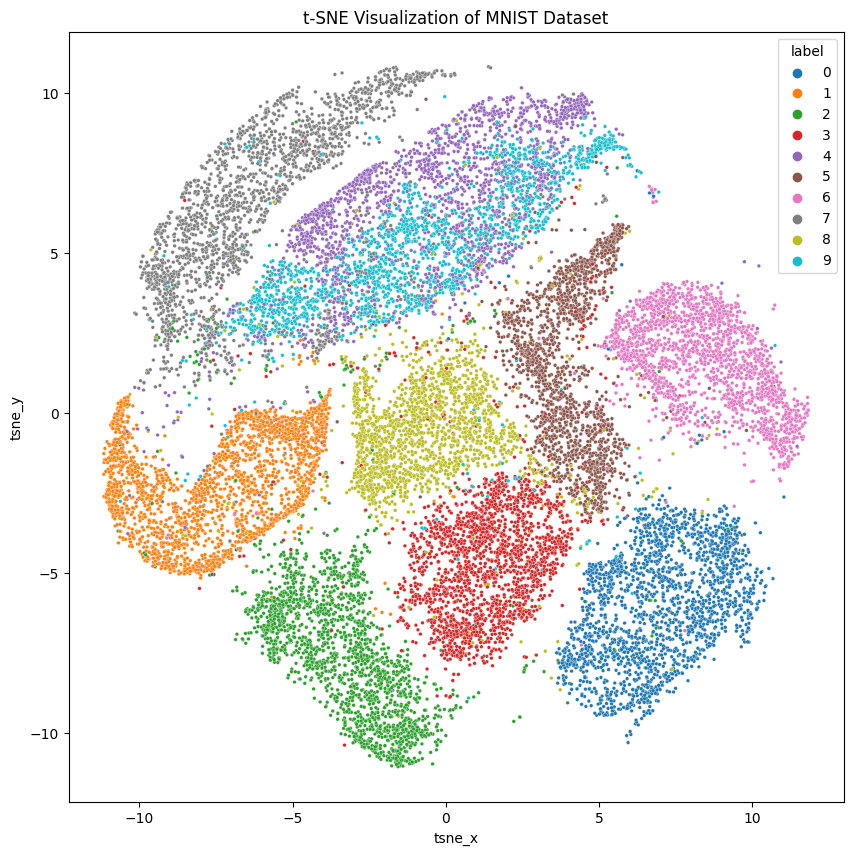

In [24]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df, x='tsne_x', y='tsne_y', hue='label', palette='tab10', s=7)
plt.title('t-SNE Visualization of MNIST Dataset')
plt.show()

<h2> Semisupervised Learning </h2>
    <ul>
        <li> Using KMeans clustering for semisupervised learning
    </ul>

In [25]:
X = train_images.reshape(-1,28*28)/255
y = train_labels
N = 10000
n_clusters = 50
X_lb = X[:N]
y_lb = y[:N]
kmeans = KMeans(n_clusters = n_clusters)
kmeans.fit(X_lb)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=50)

In [26]:
center_to_label = [round(np.array([y_lb[i] for i in np.where(kmeans.labels_==km_label)[0]]).mean()) for km_label in range(n_clusters)]
center_to_label

[2,
 7,
 1,
 6,
 8,
 0,
 3,
 1,
 5,
 0,
 6,
 6,
 5,
 8,
 4,
 7,
 5,
 7,
 2,
 6,
 1,
 6,
 5,
 7,
 4,
 0,
 0,
 0,
 1,
 6,
 4,
 6,
 1,
 0,
 2,
 6,
 4,
 4,
 7,
 8,
 7,
 1,
 7,
 5,
 6,
 7,
 5,
 0,
 2,
 8]

In [27]:
X_unlb = X[N:]
y_unlb = y[N:]
def euklidean_distance(A,B):
    return np.sqrt(np.sum((A-B)**2,axis=1))
for i in np.arange(1,30):
    distances_from_clusters = euklidean_distance(X_unlb[i], kmeans.cluster_centers_)
    center_id_with_minimum_distance = np.argmin(distances_from_clusters)
    print(center_to_label[center_id_with_minimum_distance],y_unlb[i])

8 8
7 7
7 9
7 9
0 0
1 1
1 1
5 5
2 2
0 0
4 3
5 8
6 4
7 7
5 5
2 2
6 6
7 4
7 7
1 1
1 8
0 0
7 9
2 2
0 0
0 0
1 1
6 9
2 2


In [96]:
from sklearn.model_selection import train_test_split
sample_size = 2000
labeled_percentage = 0.04
X_s, y_s = train_test_split(X, y, stratify = y, test_size=sample_size, random_state=1991)[1::2]
X_train, X_test , y_train, y_test = train_test_split(X_s, y_s, stratify = y_s, test_size=0.2, random_state=1991)
X_unlb, X_lb, y_unlb, y_lb, = train_test_split(X_train, y_train, stratify=y_train, test_size = labeled_percentage, random_state=1991)

In [97]:
lr = LogisticRegression(max_iter=10000)
lr.fit(X_lb, y_lb)
print(lr.score(X_test,y_test),'which is not good')

0.695 which is not good


1536

In [145]:
kmeans = KMeans(n_clusters=50, random_state=1991)
# This function calculates the distnaces from all clusters centers
# It does this np.sqrt(np.sum((X_train[0]-kmeans.cluster_centers_)**2, axis=1))
distances = kmeans.fit_transform(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [148]:
distances.shape

(1600, 50)

In [151]:
# Indices of digits that are closest to the cluster centers
indices_of_representative_digits = np.argmin(distances, axis=1)
X_repr = X_train[closest_to_centers_digits]

In [132]:
((X_train[0]-kmeans.cluster_centers_)**2).shape

(50, 784)

In [143]:
distances[0]

array([ 8.18933439,  6.90156613,  4.54504434,  6.8412508 ,  7.73427555,
        5.93873161,  7.67631065,  9.59277959,  8.07425899,  9.6884415 ,
        8.88323398,  8.14138226,  6.61493802,  8.07306752,  9.38686958,
        8.54097519,  8.00039018,  7.94693844,  9.59130719,  8.86565481,
        8.00143381, 10.76810098,  8.18759683,  8.6605008 ,  7.85887261,
       10.00630191,  8.63163875,  6.83956875,  6.35423758,  2.2035392 ,
        7.13201457,  8.5780166 ,  6.877088  ,  7.50448832,  7.66614756,
        7.11176815,  5.32803261,  7.80576492,  8.61045647,  6.95151834,
        7.28386951,  8.38511702,  7.7313186 ,  8.93007579,  6.4290743 ,
        8.97571119,  7.14992328,  4.72060941,  6.73711697,  5.73278239])